Importing necessary libraries and reading the input df.

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [249]:
df = pd.read_csv('../../data/Property Value Regression/train.csv')


In [250]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [251]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [252]:
df.isna().sum() 

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64


<BarContainer object of 2 artists>

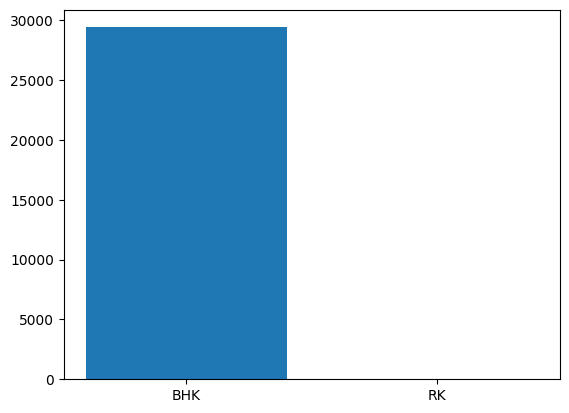

In [253]:
print(df["BHK_OR_RK"].value_counts())
plt.bar(["BHK","RK"],df["BHK_OR_RK"].value_counts())

We can drop this column of BHK_OR_RK as it is not useful for our model.

In [254]:
df.drop("BHK_OR_RK",axis=1,inplace=True) ;
df.head() 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [255]:
df["CITY"] = df["ADDRESS"].str.split(",").str[-1]
df.head() 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata


In [ ]:
# remove the entries where that city has occured less than 5 times 

city_counts = df["CITY"].value_counts()
df = df[df["CITY"].isin(city_counts[city_counts>5].index)]

df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra
29447,Owner,0,0,2,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,Vapi
29448,Dealer,0,0,2,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur
29449,Owner,0,0,2,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai


In [257]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'
    
df['city_tier'] = df['CITY'].apply(map_city)
df.head()
for city in df['CITY'].unique():
    # Finding avg price of each city
    avg_price = df[df['CITY'] == city]['TARGET(PRICE_IN_LACS)'].mean()
    # Replacing city with avg price
    df.loc[df['CITY'] == city, 'CITY'] = avg_price
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,city_tier
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,162.827783,tier1
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,62.353488,tier2
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,162.827783,tier1
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,54.406964,tier2
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,99.80708,tier1


In [258]:
df = df.join(pd.get_dummies(df.city_tier , dtype=int))  
df = df.join(pd.get_dummies(df.POSTED_BY , dtype=int))
df.drop(["ADDRESS" , "POSTED_BY"],axis=1,inplace=True) ;
df.drop("city_tier",axis=1,inplace=True) ;



<Axes: >

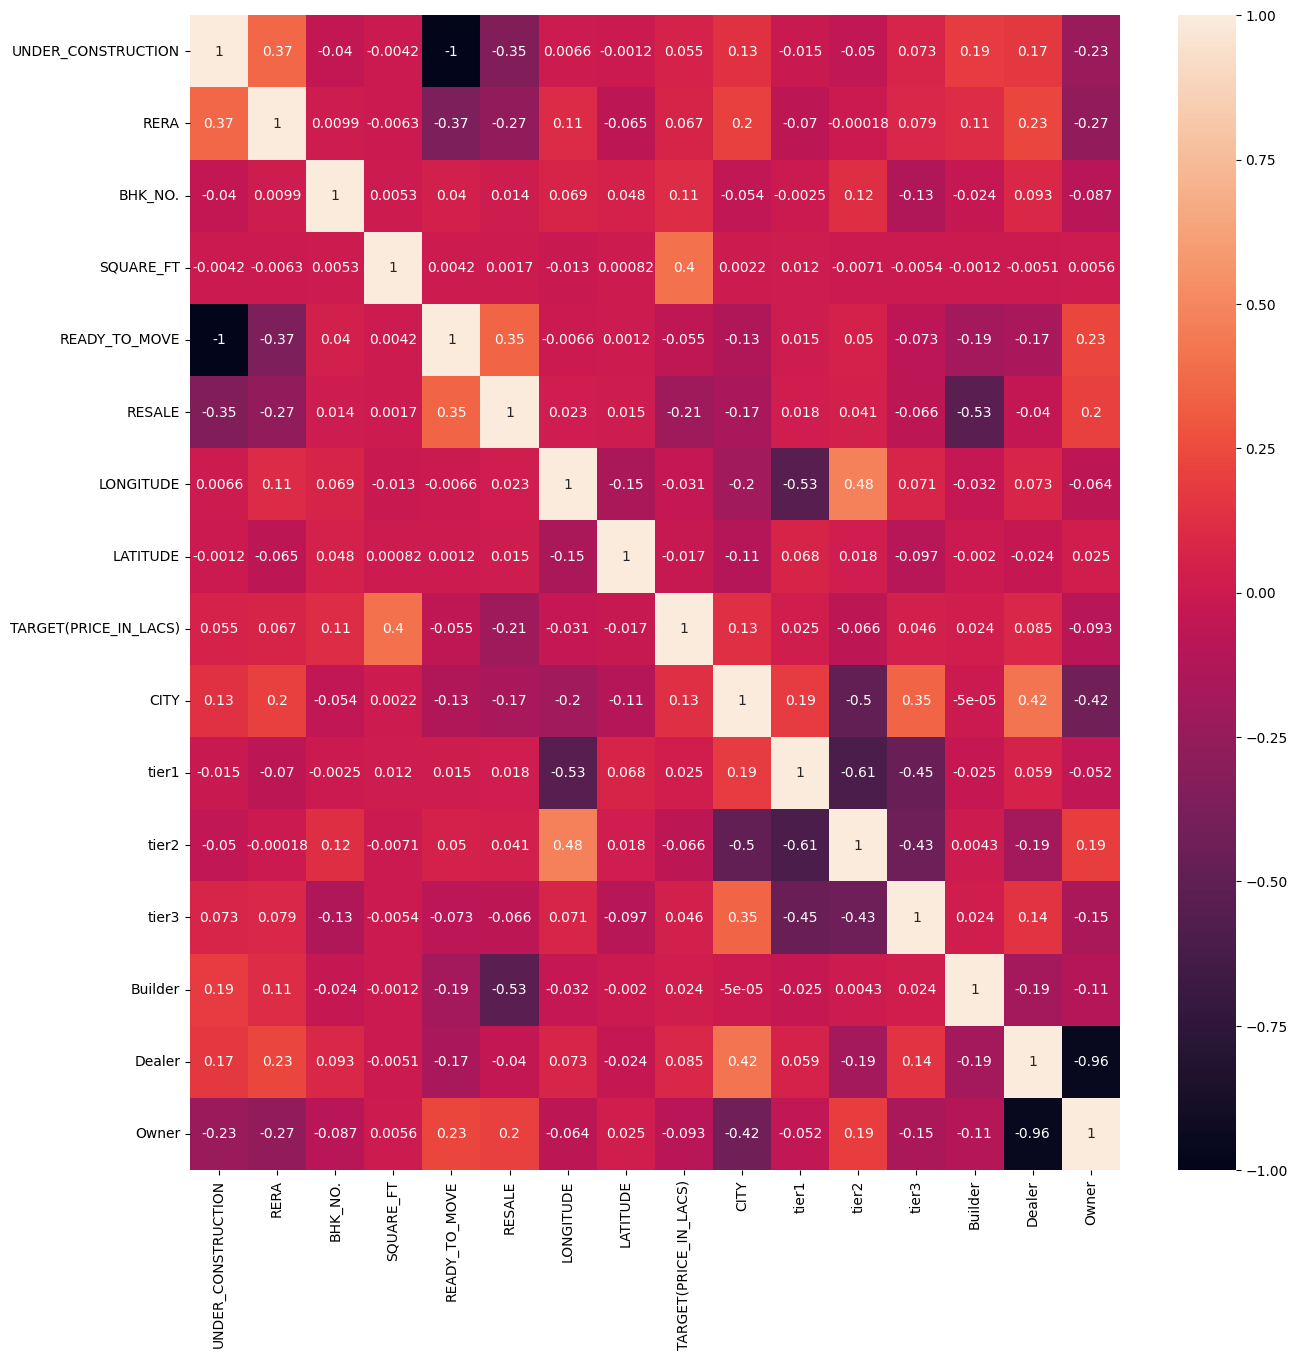

In [259]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [260]:
df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,tier1,tier2,tier3,Builder,Dealer,Owner
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,162.827783,1,0,0,0,0,1
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,62.353488,0,1,0,0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,162.827783,1,0,0,0,0,1
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,54.406964,0,1,0,0,0,1
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,99.80708,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,39.883133,0,1,0,0,0,1
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,24.427027,0,0,1,0,0,1
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,55.332848,0,1,0,0,1,0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,141.673147,1,0,0,0,0,1


In [264]:
df["SQUARE_FT"] = np.log1p(df["SQUARE_FT"] + 1) ;
df["CITY"] = np.log1p(df["CITY"] + 1 ) ;
df.corr() 


TypeError: loop of ufunc does not support argument 0 of type numpy.float64 which has no callable log1p method

In [262]:
# Performing linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop("TARGET(PRICE_IN_LACS)",axis=1)
y = df["TARGET(PRICE_IN_LACS)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()






model.fit(X_train, y_train)
# Scale the data

# X_test = scaler.transform(X_test)



model.score(X_test, y_test)

0.5770485591785739